In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import fastai
from fastai.vision import *

%matplotlib inline

## Exploration

(50, 50, 3)


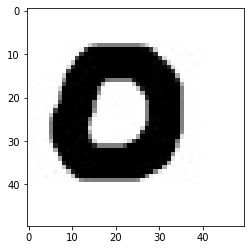

In [2]:
im = cv2.imread('data/data/custom_set/0/0 (15).jpg')
print(im.shape)
plt.imshow(im)
plt.show()

(28, 28, 3)


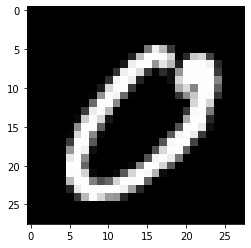

In [3]:
im = cv2.imread('data/data/mnist/testing/0/8808.png')
print(im.shape)
plt.imshow(im)
plt.show()

(28, 28, 3)


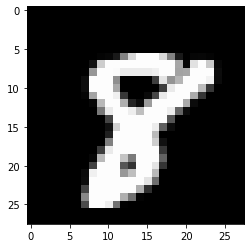

In [4]:
im = cv2.imread('data/data/mnist/training/8/12085.png')
print(im.shape)
plt.imshow(im)
plt.show()

## Data

In [5]:
bs = 128

In [6]:
train_path = './data/data/mnist/training/'
train_db = (ImageList.from_folder(train_path, convert_mode='L')
            .split_by_rand_pct(0.2)
            .label_from_folder()
            .databunch(bs=bs)
     )

## Model
`conv_layer` is a convolution layer followed by relu and batchnorm.

In [7]:
model = nn.Sequential(
    conv_layer(1, 4, stride=2), # size 14x14
    conv_layer(4, 8, stride=2), # size 7x7
    conv_layer(8, 16, stride=2), # size 4x4
    conv_layer(16, 32, stride=2), # size 2x2
    conv_layer(32, 10, stride=2), # size 1x1
    Flatten()
)

## Learner

In [8]:
learn = Learner(train_db, 
                model, 
                loss_func=nn.CrossEntropyLoss(), 
                metrics=accuracy)

In [43]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [4, 14, 14]          36         True      
______________________________________________________________________
ReLU                 [4, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [4, 14, 14]          8          True      
______________________________________________________________________
Conv2d               [8, 7, 7]            288        True      
______________________________________________________________________
ReLU                 [8, 7, 7]            0          False     
______________________________________________________________________
BatchNorm2d          [8, 7, 7]            16         True      
______________________________________________________________________
Conv2d               [16, 4, 4]           1,152      True      
___________________________________________________

## Train

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


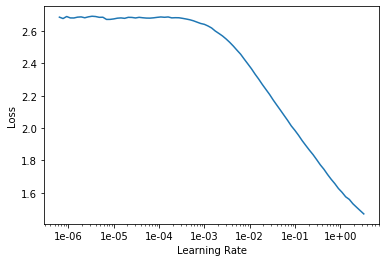

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(5, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.179479,0.163012,0.949167,00:11
1,0.126966,0.132880,0.958667,00:09
2,0.086229,0.109814,0.966500,00:10
3,0.054650,0.055895,0.983167,00:10
4,0.037726,0.046190,0.986250,00:11


## Test on test set

In [11]:
test_path = './data/data/mnist/testing/'
test_db = (ImageList.from_folder(test_path, convert_mode='L')
           .split_none()
           .label_from_folder()
           .databunch(bs=bs)
          )

In [12]:
correct = 0
for x,y in test_db.train_dl:
    y_pred = learn.model(x).argmax(dim=-1)
    correct += (y_pred == y).sum()

acc = int(correct)/ len(test_db.train_ds)
print(f'Accuracy on test set is {acc}')

Accuracy on test set is 0.9866


## Accuracy on custom set:

In [37]:
def _invert_im(x):
    return 1 - x
invert_im = TfmPixel(_invert_im, order=0)
tfm_list = [[invert_im()],[]]

In [38]:
test_path2 = './data/data/custom_set/'
test_db2 = (ImageList.from_folder(test_path2, convert_mode='L')
           .split_none()
           .label_from_folder()
           .transform(tfms=tfm_list, size=28, resize_method=ResizeMethod.SQUISH)
           .databunch(bs=578)
          )

In [39]:
correct = 0
for x,y in test_db2.train_dl:
    y_pred = learn.model(x).argmax(dim=-1)
    correct += (y_pred == y).sum()

acc = int(correct)/ len(test_db2.train_ds)
print(f'Accuracy on test set is {acc}')


Accuracy on test set is 0.8339100346020761


## Save Model

In [41]:
learn.save('mnist', return_path=True)

PosixPath('data/data/mnist/training/models/mnist.pth')